In [303]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


#warning
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [304]:
df = pd.read_csv("car_data_new.csv")

In [305]:
df.head(20)

,Fiyat,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Hızlanma (0-100/Sn),Agirlik,Silindir_Sayisi
0,1475000.00,18 Kasım 2023,Honda,Civic,1.5 i-VTEC Eco Executive Plus,2023,6100.00,Otomatik,Benzin,Sedan,Mavi,1498,129,Önden Çekiş,6.50,47,248,2050,4.00
1,610000.00,18 Kasım 2023,Volkswagen,Passat,1.6 FSi Comfortline,2008,210000.00,Düz,Benzin,Sedan,Lacivert,1598,115,Önden Çekiş,7.50,70,180,1548,4.00
2,715000.00,18 Kasım 2023,Fiat,Egea,1.4 Fire Urban Plus,2020,69000.00,Düz,Benzin,Sedan,Beyaz,1368,95,Önden Çekiş,5.70,45,180,1548,4.00
3,620000.00,17 Kasım 2023,Hyundai,Accent Blue,1.6 CRDI Mode Plus,2012,199000.00,Otomatik,Dizel,Sedan,Füme,1582,128,Önden Çekiş,5.60,43,200,1798,4.00
4,618000.00,17 Kasım 2023,Citroen,C-Elysee,1.5 BlueHDi Shine,2021,101000.00,Düz,Dizel,Sedan,Beyaz,1499,100,Önden Çekiş,3.90,50,185,1675,4.00
5,460000.00,17 Kasım 2023,Renault,Fluence,1.5 dCi Extreme,2011,254000.00,Yarı Otomatik,Dizel,Sedan,Füme,1461,110,Önden Çekiş,4.40,60,163,1545,4.00
6,1265000.00,17 Kasım 2023,Mercedes - Benz,CLA,180 D Comfort,2017,88000.00,Otomatik,Dizel,Sedan,Beyaz,1461,109,Önden Çekiş,3.80,50,188,1810,4.00
7,455000.00,17 Kasım 2023,Renault,Scenic,1.6 Expression,2008,217000.00,Düz,LPG & Benzin,MPV,Füme,1598,115,Önden Çekiş,7.20,60,190,1650,4.00
8,799000.00,17 Kasım 2023,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,2013,194000.00,Düz,Benzin,Sedan,Siyah,1390,122,Önden Çekiş,5.90,70,189,1590,4.00
9,965000.00,17 Kasım 2023,Honda,Civic,1.6 i-VTEC Elegance,2017,120000.00,Otomatik,LPG & Benzin,Sedan,Siyah,1597,125,Önden Çekiş,6.70,47,185,1814,4.00


In [253]:
df.sample(n=20, random_state=42)  # random_state, çekilen örneklerin her seferinde aynı olmasını sağlar


,Fiyat,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Hızlanma (0-100/Sn),Agirlik,Silindir_Sayisi
1222,455000.00,18 Kasım 2023,Renault,Symbol,1.5 dCi SL Collection,2011,214000.00,Düz,Dizel,Bilinmiyor,Diğer,1461,65,Önden Çekiş,4.50,50,176,1708,4.00
111,600000.00,15 Kasım 2023,Volkswagen,Golf,1.6 Comfortline,2005,106200.00,Otomatik,Benzin,Hatchback/3,Gri,1595,102,Önden Çekiş,7.40,55,170,1605,3.00
554,725000.00,19 Kasım 2023,Opel,Astra,1.3 CDTI Enjoy Active,2013,67000.00,Düz,Dizel,Hatchback/5,Beyaz,1248,95,Önden Çekiş,4.10,56,167,1600,4.00
526,375000.00,19 Kasım 2023,Dacia,Logan,1.5 dCi Ambiance,2008,119000.00,Düz,Dizel,Sedan,Gri,1461,70,Önden Çekiş,5.10,50,160,1535,4.00
1310,1395000.00,18 Kasım 2023,BMW,3 Serisi,316i M Sport,2014,123000.00,Otomatik,Benzin,Sedan,Beyaz,1598,136,Arkadan İtiş,5.80,60,193,2119,4.00
1100,3740000.00,18 Kasım 2023,BMW,4 Serisi,420i Edition M Sport,2023,6001.00,Otomatik,Benzin,Bilinmiyor,Diğer,1597,170,Arkadan İtiş,6.10,59,190,1850,4.00
70,1150000.00,16 Kasım 2023,BMW,1 Serisi,116d Joy,2015,66185.00,Otomatik,Dizel,Hatchback/5,Beyaz,1496,116,Arkadan İtiş,4.10,52,187,1680,3.00
251,390000.00,12 Kasım 2023,Fiat,Punto,Grande 1.3 Multijet Dynamic,2007,224000.00,Düz,Dizel,Hatchback/5,Mavi (metalik),1248,90,Önden Çekiş,4.60,45,205,1932,4.00
1314,1280000.00,18 Kasım 2023,Volkswagen,Passat,1.6 TDi BlueMotion Comfortline,2020,112000.00,Yarı Otomatik,Dizel,Sedan,Siyah,1598,120,Önden Çekiş,4.00,66,223,1830,4.00
1029,1280000.00,18 Kasım 2023,Honda,Civic,1.5 i-VTEC Elegance,2021,13600.00,Otomatik,Benzin,Sedan,Beyaz,1498,182,Önden Çekiş,6.70,47,177,1526,4.00


In [306]:
df.drop(columns='İlan Tarihi',inplace=True)
df.drop(columns='Model',inplace=True)
df.drop(columns='Seri',inplace=True)

In [307]:
df.isnull().sum()

Fiyat                  0
Marka                  0
Yıl                    0
Kilometre              0
Vites Tipi             0
Yakıt Tipi             0
Kasa Tipi              0
Renk                   0
Motor Hacmi            0
Motor Gücü             0
Çekiş                  0
Ort. Yakıt Tüketimi    0
Yakıt Deposu           0
Hızlanma (0-100/Sn)    0
Agirlik                0
Silindir_Sayisi        0
dtype: int64

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fiyat                1900 non-null   float64
 1   Marka                1900 non-null   object 
 2   Yıl                  1900 non-null   int64  
 3   Kilometre            1900 non-null   float64
 4   Vites Tipi           1900 non-null   object 
 5   Yakıt Tipi           1900 non-null   object 
 6   Kasa Tipi            1900 non-null   object 
 7   Renk                 1900 non-null   object 
 8   Motor Hacmi          1900 non-null   int64  
 9   Motor Gücü           1900 non-null   int64  
 10  Çekiş                1900 non-null   object 
 11  Ort. Yakıt Tüketimi  1900 non-null   float64
 12  Yakıt Deposu         1900 non-null   int64  
 13  Hızlanma (0-100/Sn)  1900 non-null   int64  
 14  Agirlik              1900 non-null   int64  
 15  Silindir_Sayisi      1900 non-null   f

In [308]:
df.describe([.25,0.5,0.75,1]).T

,count,mean,std,min,25%,50%,75%,100%,max
Fiyat,1900.00,37249356206.05,743055089603.86,100000.00,438750.00,610000.00,799999.25,24000002350000.00,24000002350000.00
Yıl,1900.00,2011.56,6.28,1979.00,2007.00,2012.00,2016.00,2023.00,2023.00
Kilometre,1900.00,174668.43,102840.68,0.00,106000.00,166750.00,230000.00,1780000.00,1780000.00
Motor Hacmi,1900.00,1486.64,249.49,796.00,1368.00,1461.00,1598.00,4398.00,4398.00
Motor Gücü,1900.00,107.69,36.12,51.00,90.00,102.00,120.00,843.00,843.00
Ort. Yakıt Tüketimi,1900.00,5.52,1.38,3.40,4.40,5.20,6.50,12.30,12.30
Yakıt Deposu,1900.00,52.18,7.76,35.00,45.00,50.00,56.00,88.00,88.00
Hızlanma (0-100/Sn),1900.00,185.39,18.06,145.00,170.00,185.00,195.00,300.00,300.00
Agirlik,1900.00,1728.00,203.22,1059.00,1575.00,1710.00,1850.00,2555.00,2555.00
Silindir_Sayisi,1900.00,3.97,0.33,3.00,4.00,4.00,4.00,8.00,8.00


In [258]:
df[df["Fiyat"] > 10000000].head()

,Fiyat,Marka,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Hızlanma (0-100/Sn),Agirlik,Silindir_Sayisi
22,895000885000.00,Peugeot,2014,133000.00,Yarı Otomatik,Dizel,Sedan,Siyah,1560,117,Önden Çekiş,4.00,72,188,1650,4.00
56,525000510000.00,Fiat,2012,140000.00,Düz,Dizel,Sedan,Gri (Gümüş),1248,95,Önden Çekiş,4.90,45,190,1920,4.00
104,675000660000.00,Ford,2012,22000.00,Düz,Dizel,Hatchback/5,Beyaz,1398,70,Önden Çekiş,4.20,45,186,1770,4.00
112,595000565000.00,Ford,2010,319000.00,Otomatik,LPG & Benzin,Sedan,Lacivert,1596,100,Önden Çekiş,6.70,55,192,1900,4.00
119,780000760000.00,Renault,2016,188000.00,Düz,Dizel,Sedan,Mavi,1461,110,Önden Çekiş,4.60,60,190,1725,4.00


In [259]:
df[df["Fiyat"] > 10000000].shape

(34, 16)

In [309]:
filtrelenmis_df = df[df["Fiyat"] > 10000000]
df = df.drop(df[df["Fiyat"] > 10000000].index)

In [261]:
df.describe([.25,0.5,0.75,1]).T

,count,mean,std,min,25%,50%,75%,100%,max
Fiyat,1866.00,672672.70,411575.63,100000.00,435000.00,605000.00,789375.00,5600000.00,5600000.00
Yıl,1866.00,2011.53,6.30,1979.00,2007.00,2012.00,2016.00,2023.00,2023.00
Kilometre,1866.00,175314.52,102950.75,21.00,107125.00,168000.00,230000.00,1780000.00,1780000.00
Motor Hacmi,1866.00,1483.02,229.94,796.00,1368.00,1461.00,1598.00,4398.00,4398.00
Motor Gücü,1866.00,106.92,28.49,51.00,90.00,102.00,120.00,333.00,333.00
Ort. Yakıt Tüketimi,1866.00,5.52,1.37,3.40,4.40,5.20,6.50,11.40,11.40
Yakıt Deposu,1866.00,52.17,7.75,35.00,45.00,50.00,56.00,88.00,88.00
Hızlanma (0-100/Sn),1866.00,185.35,18.07,145.00,170.00,184.00,195.00,300.00,300.00
Agirlik,1866.00,1727.91,203.04,1059.00,1575.00,1710.00,1850.00,2555.00,2555.00
Silindir_Sayisi,1866.00,3.97,0.33,3.00,4.00,4.00,4.00,8.00,8.00


In [263]:
## Fiyat

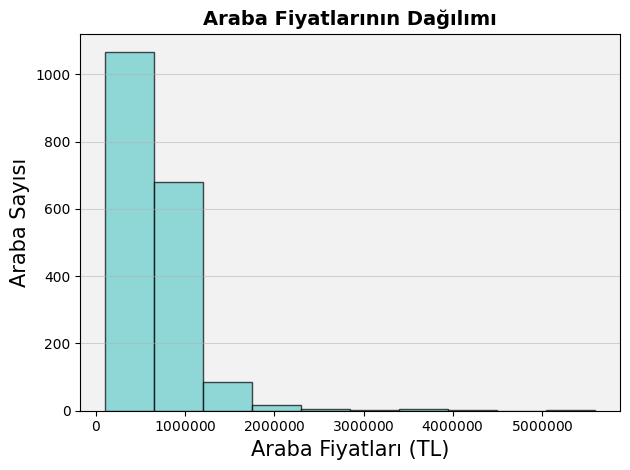

In [310]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Fiyat'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Araba Fiyatları (TL)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Araba Fiyatlarının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

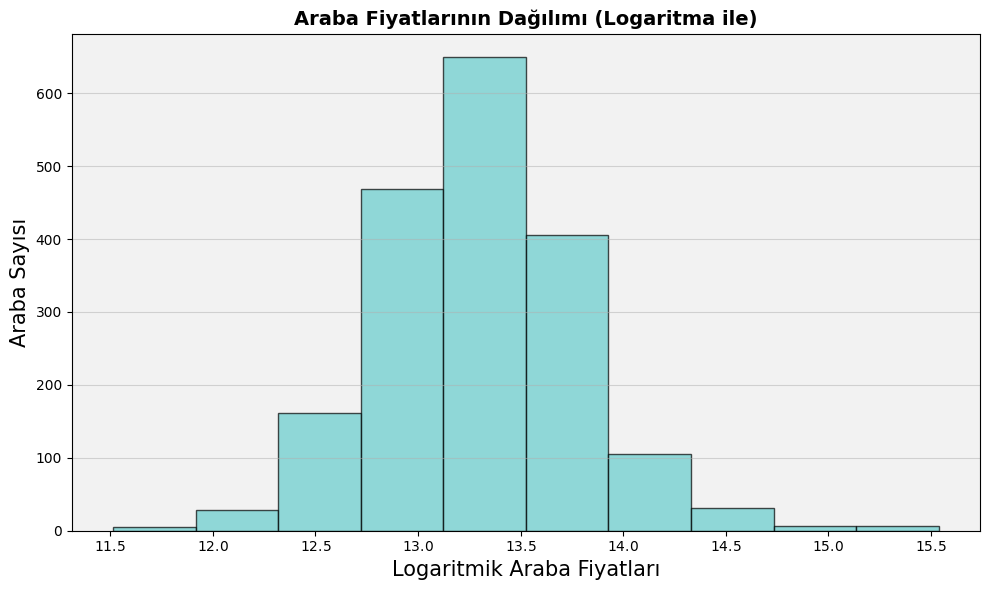

In [311]:
plt.figure(figsize=[10, 6])
plt.hist(np.log1p(df['Fiyat']), bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Logaritmik Araba Fiyatları', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Araba Fiyatlarının Dağılımı (Logaritma ile)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

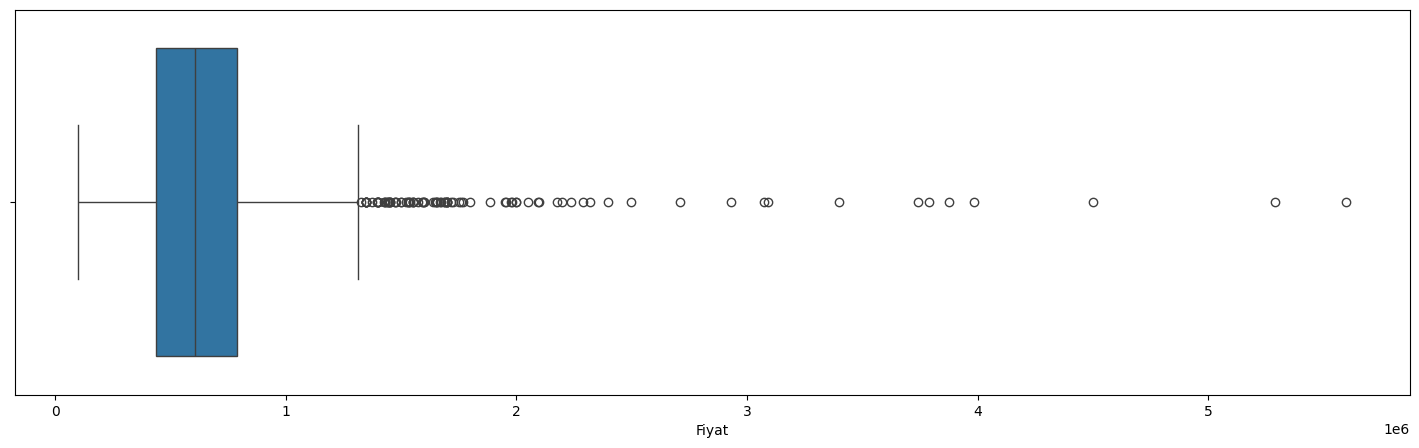

In [312]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Fiyat'], data=df);

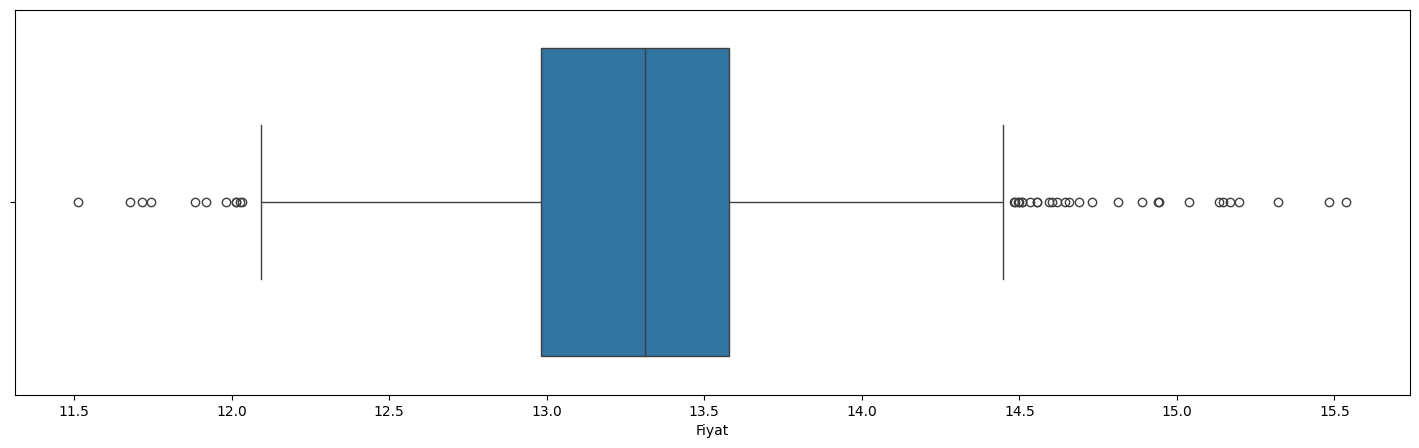

In [313]:
plt.figure(figsize=[18,5])
sns.boxplot(x=np.log1p(df['Fiyat']), data=df)
plt.show()

In [314]:
# Threshold setting function
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5*iqr
    up_limit = quartile3 + 1.5*iqr
    return low_limit,up_limit

# Is there an outlier or not?
def check_outlier(dataframe,col_name):
    low,up = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[col_name]>up)].any(axis=None):
        return True
    else:
        return False


# Which observations outlier ?
def grab_outliers(dataframe,col,index=False):
    low,up = outlier_thresholds(dataframe,col)
    if not dataframe[(dataframe[col] < low) | (dataframe[col] > up)].any(axis=None):
        print("There is no outlier")
        return 0
    if dataframe[(dataframe[col] < low) | (dataframe[col] > up)].shape[0] > 10:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)].head())
    else:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)])
    if index:
        return dataframe[(dataframe[col] < low) | (dataframe[col] > up)].index


# Removing outliers
def remove_outlier(dataframe,col):
    low,up = outlier_thresholds(dataframe,col)
    data_without_outliers = dataframe[~((dataframe[col] < low) | (dataframe[col]>up))]
    return data_without_outliers


In [315]:
grab_outliers(df,"Fiyat")

        Fiyat       Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi   Renk  Motor Hacmi  Motor Gücü          Çekiş  Ort. Yakıt Tüketimi  Yakıt Deposu  Hızlanma (0-100/Sn)  Agirlik  Silindir_Sayisi
0  1475000.00       Honda  2023    6100.00       Otomatik        Benzin        Sedan   Mavi         1498         129    Önden Çekiş                 6.50            47                  248     2050             4.00
15 1980000.00         BMW  2005  208000.00       Otomatik  LPG & Benzin   Bilinmiyor  Diğer         4398         333   Arkadan İtiş                10.90            70                  203     1840             4.00
60 2050000.00  Volkswagen  2017  100200.00  Yarı Otomatik         Dizel  Hatchback/5    Gri         1968         240  4WD (Sürekli)                 5.90            66                  164     1535             4.00
83 2100000.00         BMW  2016  255000.00       Otomatik         Dizel        Sedan  Beyaz         1995         218  4WD (Sürekli)             

In [270]:
# df = df.loc[(100000 < df['Fiyat']) & (df['Fiyat'] <= 2000000)]

In [271]:
# Yıllar

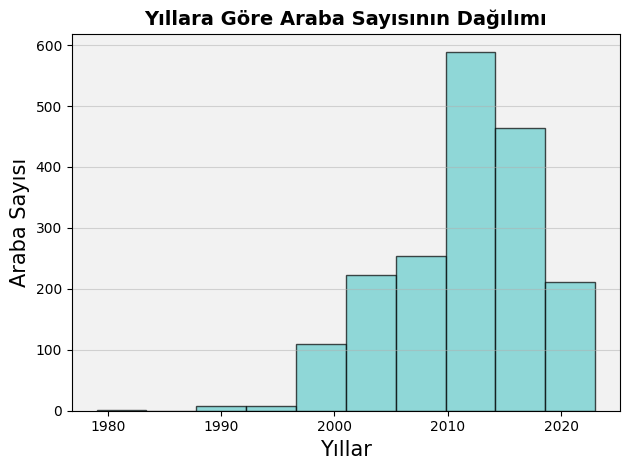

In [317]:
plt.hist(df['Yıl'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Yıllar', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Yıllara Göre Araba Sayısının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

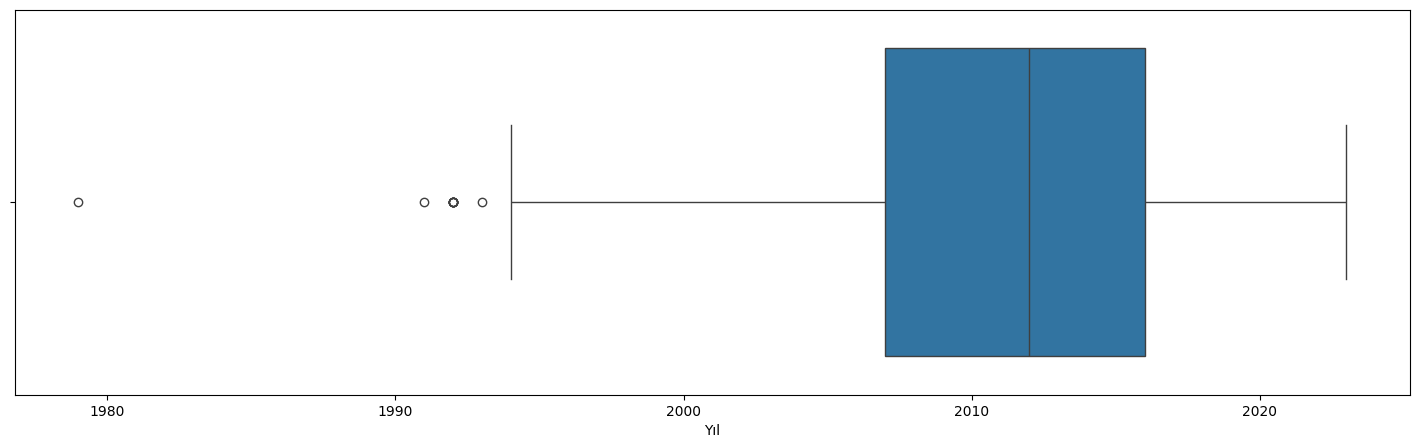

In [318]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Yıl'], data=df);

In [319]:
grab_outliers(df,"Yıl")

         Fiyat            Marka   Yıl  Kilometre Vites Tipi    Yakıt Tipi Kasa Tipi            Renk  Motor Hacmi  Motor Gücü         Çekiş  Ort. Yakıt Tüketimi  Yakıt Deposu  Hızlanma (0-100/Sn)  Agirlik  Silindir_Sayisi
673  150000.00            Tofaş  1992   36000.00        Düz  LPG & Benzin     Sedan  Mavi (metalik)         1581          83  Arkadan İtiş                 6.50            50                  182     1720             4.00
676  167000.00            Tofaş  1992  286000.00        Düz  LPG & Benzin     Sedan            Mavi         1581          83  Arkadan İtiş                 6.50            50                  181     1658             4.00
774  325000.00  Mercedes - Benz  1992  410000.00   Otomatik  LPG & Benzin     Sedan           Siyah         1998         136  Arkadan İtiş                11.10            70                  193     1900             4.00
829  122500.00            Tofaş  1991  150000.00        Düz  LPG & Benzin     Sedan            Mavi         1581    

In [321]:
df = df[df["Yıl"] >= 1995]

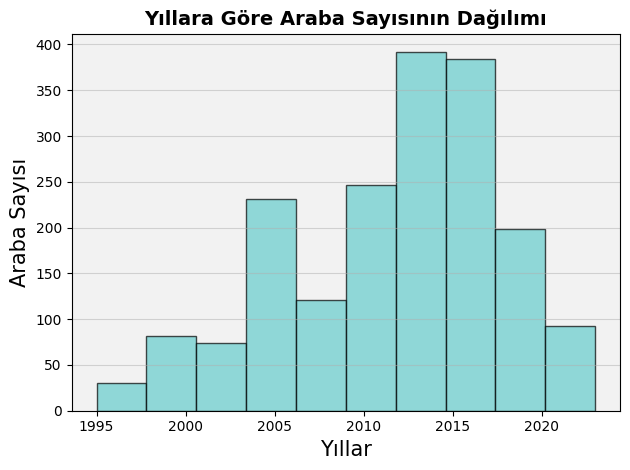

In [322]:
plt.hist(df['Yıl'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Yıllar', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Yıllara Göre Araba Sayısının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

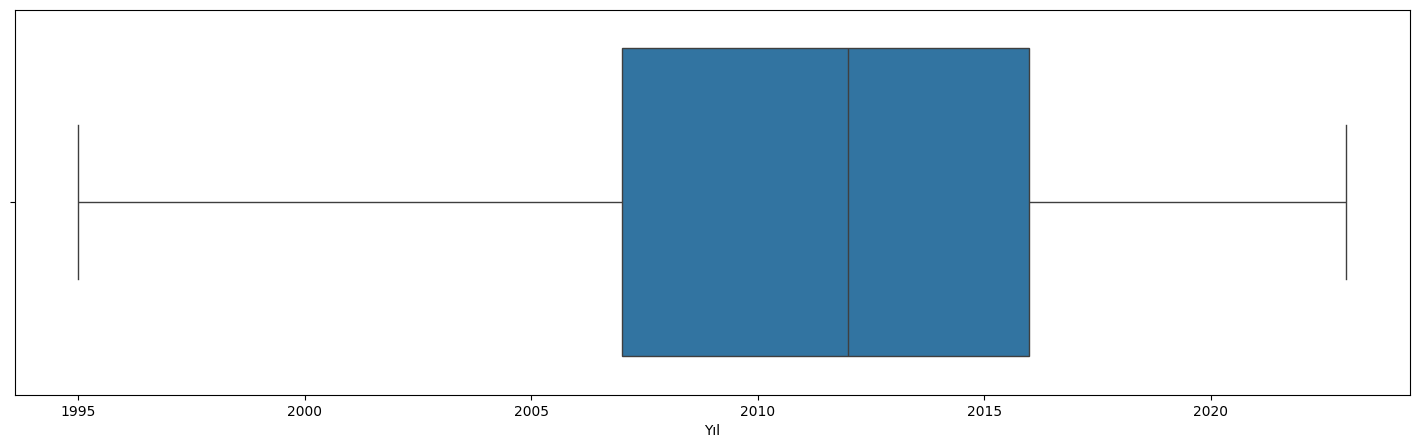

In [323]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Yıl'], data=df);

In [278]:
df.describe([.25,0.5,0.75,1]).T

,count,mean,std,min,25%,50%,75%,100%,max
Fiyat,1856.00,675425.51,410941.85,160000.00,437750.00,607250.00,790000.00,5600000.00,5600000.00
Yıl,1856.00,2011.64,6.12,1994.00,2007.00,2012.00,2016.00,2023.00,2023.00
Kilometre,1856.00,175290.58,102742.96,21.00,107875.00,168000.00,230000.00,1780000.00,1780000.00
Motor Hacmi,1856.00,1482.38,230.14,796.00,1368.00,1461.00,1598.00,4398.00,4398.00
Motor Gücü,1856.00,107.02,28.50,51.00,90.00,102.00,120.00,333.00,333.00
Ort. Yakıt Tüketimi,1856.00,5.51,1.36,3.40,4.40,5.20,6.50,11.40,11.40
Yakıt Deposu,1856.00,52.17,7.75,35.00,45.00,50.00,56.00,88.00,88.00
Hızlanma (0-100/Sn),1856.00,185.33,18.08,145.00,170.00,184.00,195.00,300.00,300.00
Agirlik,1856.00,1727.27,202.66,1059.00,1572.25,1708.00,1850.00,2555.00,2555.00
Silindir_Sayisi,1856.00,3.97,0.33,3.00,4.00,4.00,4.00,8.00,8.00


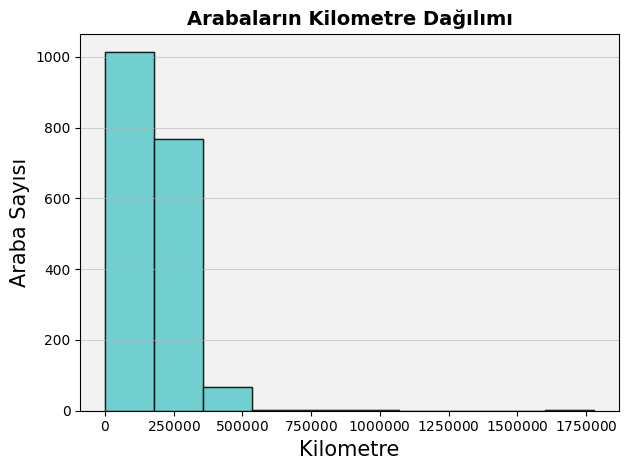

In [324]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Kilometre', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Kilometre Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

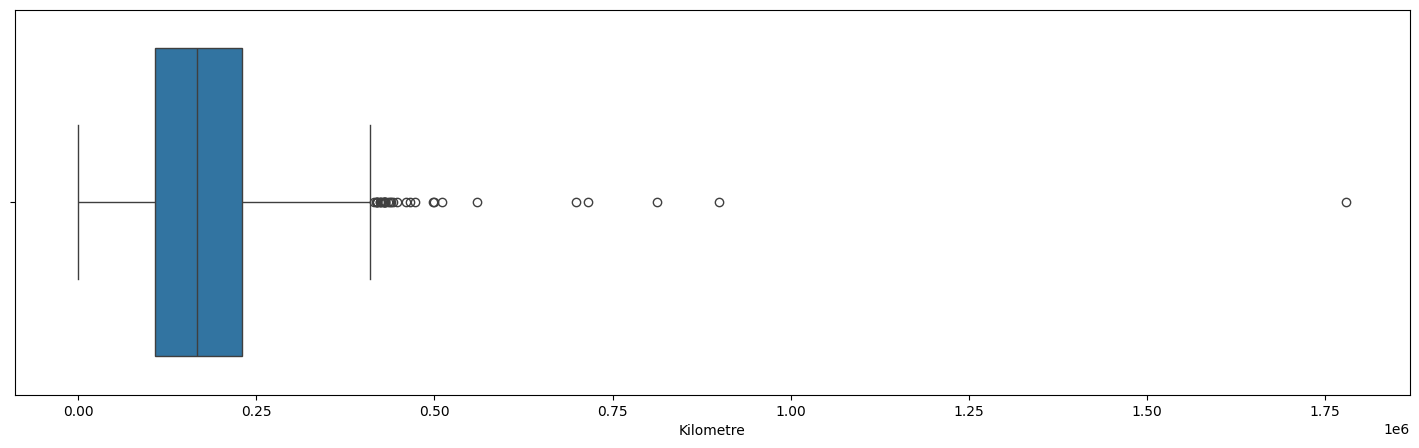

In [326]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Kilometre'], data=df);

In [327]:
grab_outliers(df,"Kilometre")

         Fiyat            Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi   Kasa Tipi         Renk  Motor Hacmi  Motor Gücü          Çekiş  Ort. Yakıt Tüketimi  Yakıt Deposu  Hızlanma (0-100/Sn)  Agirlik  Silindir_Sayisi
113 1080000.00  Mercedes - Benz  2004  425000.00       Otomatik  LPG & Benzin       Sedan  Gri (Gümüş)         3199         224  4WD (Sürekli)                10.30            80                  190     1945             4.00
227  350000.00          Hyundai  2009  430000.00            Düz         Dizel         MPV        Siyah         1493         110    Önden Çekiş                 5.30            55                  192     1693             4.00
245  775000.00       Volkswagen  2010  415000.00  Yarı Otomatik         Dizel  Bilinmiyor        Diğer         1968         170    Önden Çekiş                 6.10            70                  191     1730             4.00
277  425000.00           Toyota  2009  498000.00            Düz        Benzin       Sedan         Fü

In [282]:
df.shape

(1856, 16)

In [328]:
df = remove_outlier(df,"Kilometre")

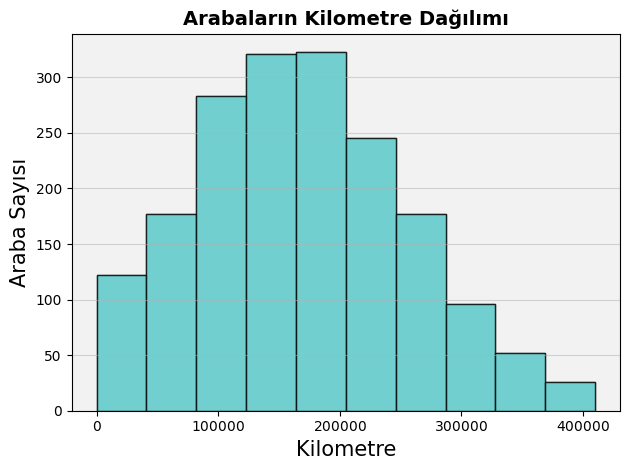

In [329]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Kilometre', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Kilometre Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [286]:
# Motor Hacmi

In [330]:
grab_outliers(df,"Motor Hacmi")

        Fiyat            Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi         Renk  Motor Hacmi  Motor Gücü          Çekiş  Ort. Yakıt Tüketimi  Yakıt Deposu  Hızlanma (0-100/Sn)  Agirlik  Silindir_Sayisi
15 1980000.00              BMW  2005  208000.00       Otomatik  LPG & Benzin   Bilinmiyor        Diğer         4398         333   Arkadan İtiş                10.90            70                  203     1840             4.00
17  305000.00             Opel  2001  327000.00       Otomatik  LPG & Benzin        Sedan  Gri (Gümüş)         1998         136    Önden Çekiş                 9.40            60                  250     2070             8.00
29 1000000.00          Hyundai  2023    6500.00  Yarı Otomatik        Benzin  Hatchback/5      Kırmızı          998         100    Önden Çekiş                 5.20            40                  195     1870             4.00
33 1250000.00  Mercedes - Benz  2013  288000.00       Otomatik        Benzin        Sedan        Bey

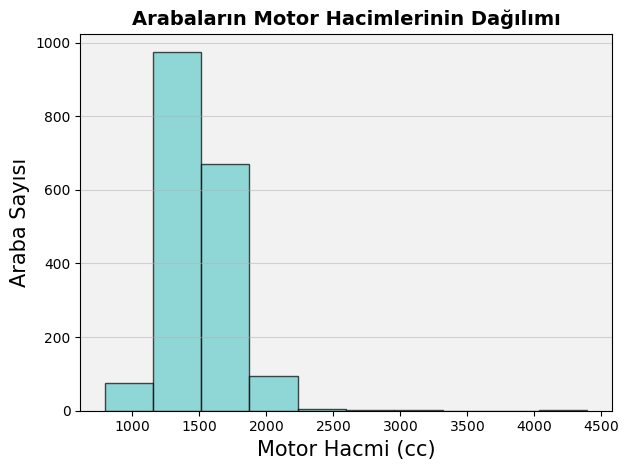

In [331]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor Hacmi'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Hacmi (cc)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Hacimlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [332]:
grab_outliers(df,"Motor Hacmi")

        Fiyat            Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi         Renk  Motor Hacmi  Motor Gücü          Çekiş  Ort. Yakıt Tüketimi  Yakıt Deposu  Hızlanma (0-100/Sn)  Agirlik  Silindir_Sayisi
15 1980000.00              BMW  2005  208000.00       Otomatik  LPG & Benzin   Bilinmiyor        Diğer         4398         333   Arkadan İtiş                10.90            70                  203     1840             4.00
17  305000.00             Opel  2001  327000.00       Otomatik  LPG & Benzin        Sedan  Gri (Gümüş)         1998         136    Önden Çekiş                 9.40            60                  250     2070             8.00
29 1000000.00          Hyundai  2023    6500.00  Yarı Otomatik        Benzin  Hatchback/5      Kırmızı          998         100    Önden Çekiş                 5.20            40                  195     1870             4.00
33 1250000.00  Mercedes - Benz  2013  288000.00       Otomatik        Benzin        Sedan        Bey

In [333]:
df = remove_outlier(df,"Motor Hacmi")

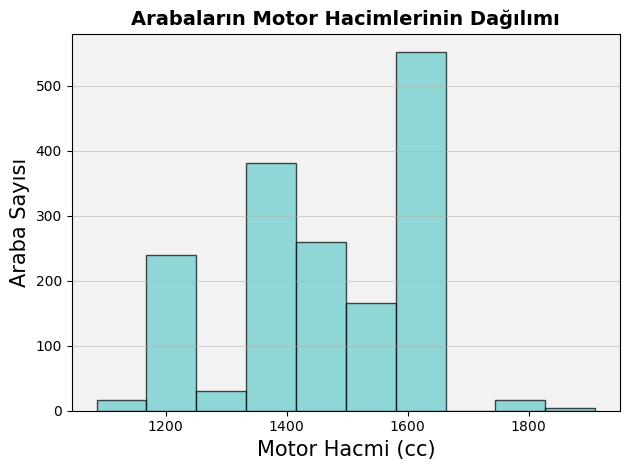

In [334]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor Hacmi'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Hacmi (cc)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Hacimlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [292]:
# Motor Gücü

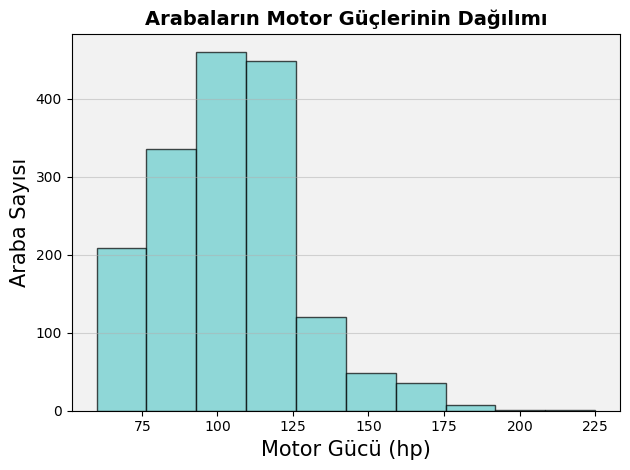

In [335]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor Gücü'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Gücü (hp)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Güçlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [336]:
df = remove_outlier(df,"Motor Gücü") 

<Axes: xlabel='Motor Gücü'>

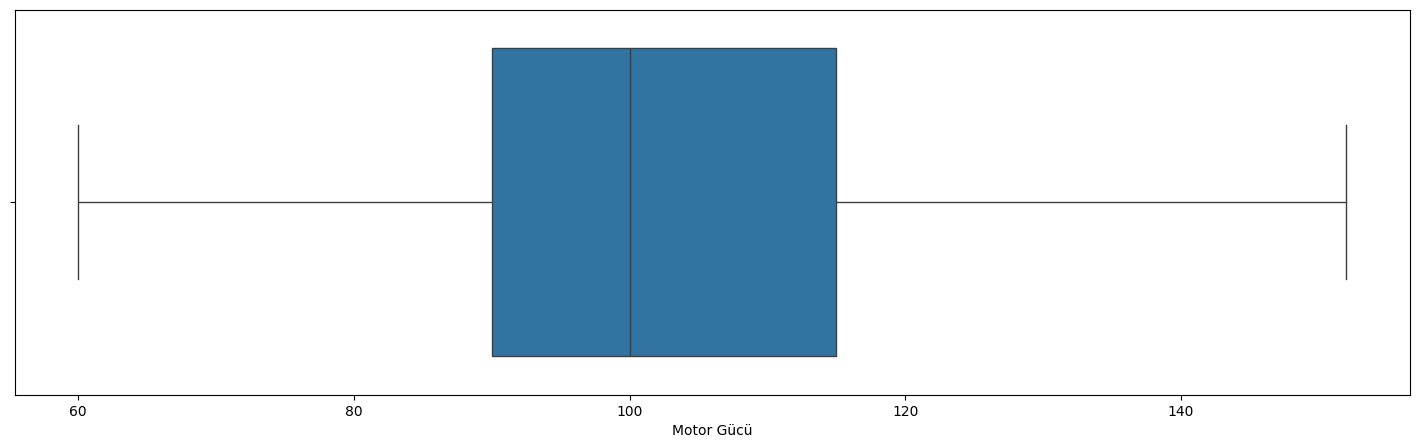

In [337]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Motor Gücü'], data=df)

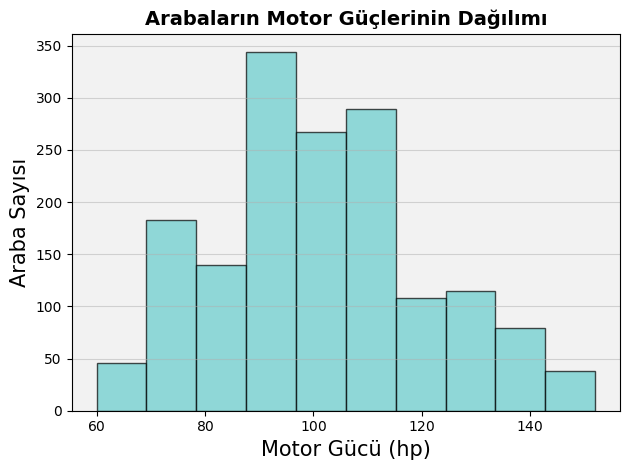

In [338]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor Gücü'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Gücü (hp)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Güçlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [298]:
# Ortalama Yakıt Tüketimi

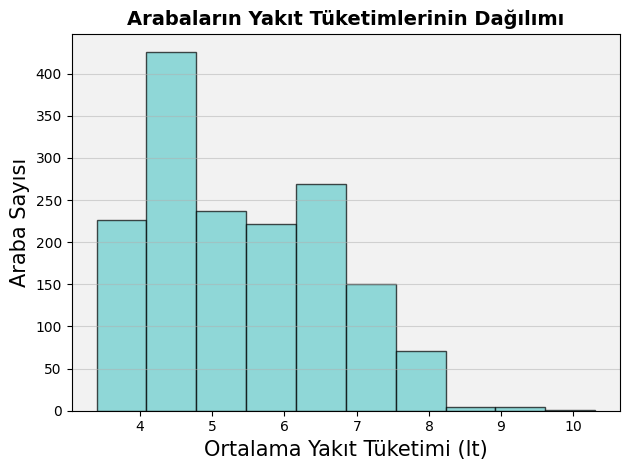

In [299]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Ort. Yakıt Tüketimi"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Ortalama Yakıt Tüketimi (lt)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Yakıt Tüketimlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [300]:
# Yakıt Deposu

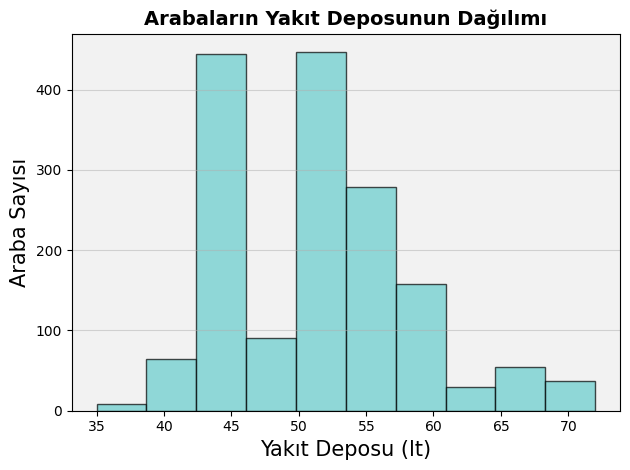

In [301]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Yakıt Deposu"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Yakıt Deposu (lt)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Yakıt Deposunun Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [ ]:
# Hızlanma

In [339]:
df.head()

,Fiyat,Marka,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Hızlanma (0-100/Sn),Agirlik,Silindir_Sayisi
0,1475000.00,Honda,2023,6100.00,Otomatik,Benzin,Sedan,Mavi,1498,129,Önden Çekiş,6.50,47,248,2050,4.00
1,610000.00,Volkswagen,2008,210000.00,Düz,Benzin,Sedan,Lacivert,1598,115,Önden Çekiş,7.50,70,180,1548,4.00
2,715000.00,Fiat,2020,69000.00,Düz,Benzin,Sedan,Beyaz,1368,95,Önden Çekiş,5.70,45,180,1548,4.00
3,620000.00,Hyundai,2012,199000.00,Otomatik,Dizel,Sedan,Füme,1582,128,Önden Çekiş,5.60,43,200,1798,4.00
4,618000.00,Citroen,2021,101000.00,Düz,Dizel,Sedan,Beyaz,1499,100,Önden Çekiş,3.90,50,185,1675,4.00


In [340]:
df['Maksimum Hız'] = df['Hızlanma (0-100/Sn)']
df.drop(columns=['Hızlanma (0-100/Sn)'], inplace=True)

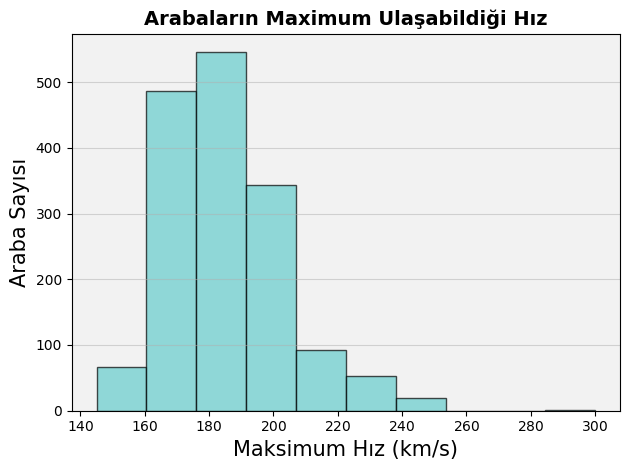

In [341]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Maksimum Hız"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Maksimum Hız (km/s)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Maximum Ulaşabildiği Hız', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

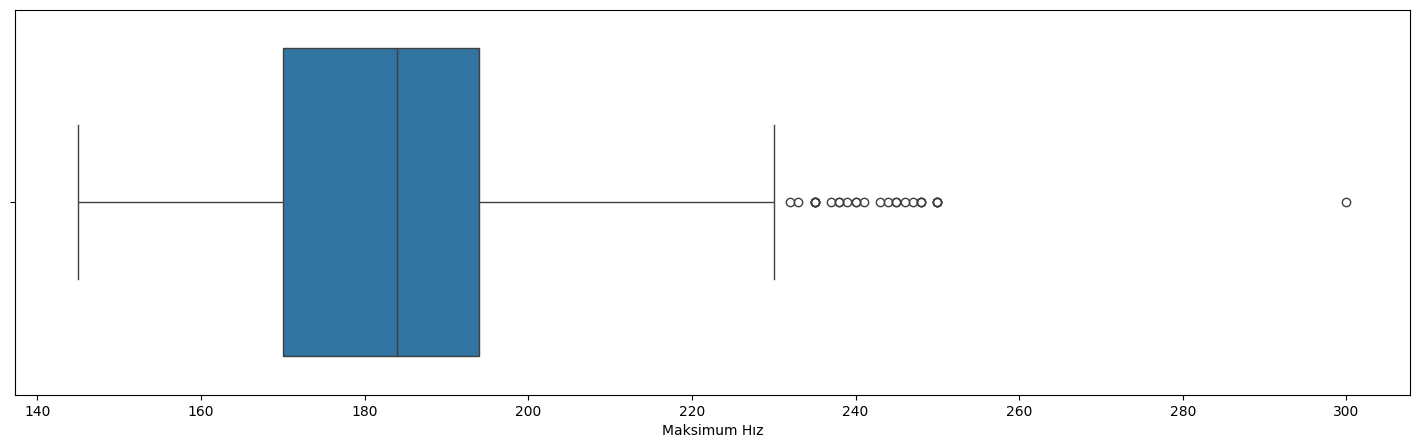

In [342]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Maksimum Hız'], data=df);

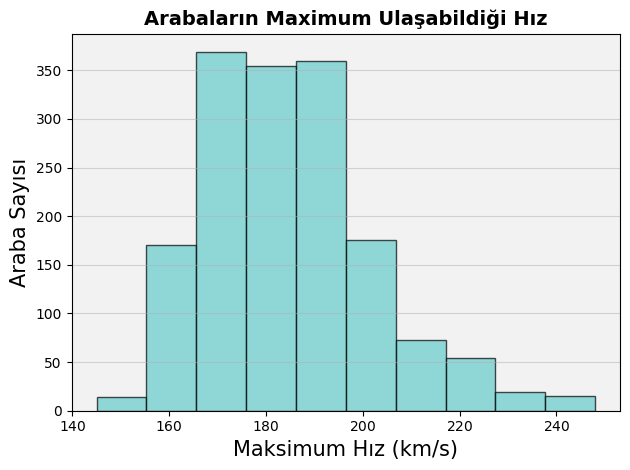

In [343]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df[df["Maksimum Hız"] < 250 ]["Maksimum Hız"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Maksimum Hız (km/s)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Maximum Ulaşabildiği Hız', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [344]:
df = df[df["Maksimum Hız"] < 250]


In [ ]:
# Agirlik

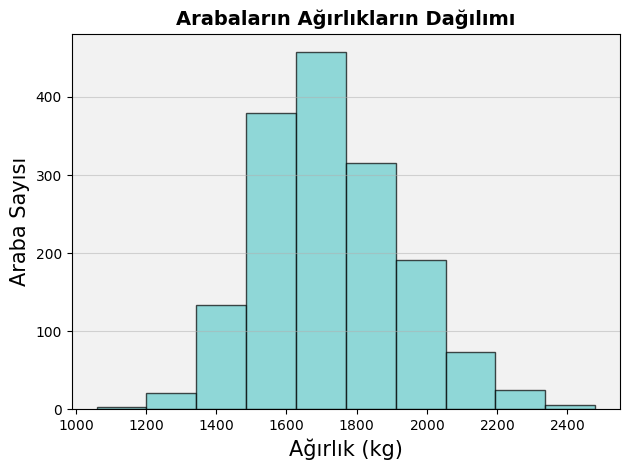

In [345]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Agirlik"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Ağırlık (kg)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Ağırlıkların Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Fiyat,Marka,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Agirlik,Silindir_Sayisi,Maksimum Hız
0,1475000.00,Honda,2023,6100.00,Otomatik,Benzin,Sedan,Mavi,1498,129,Önden Çekiş,6.50,47,2050,4.00,248
1,610000.00,Volkswagen,2008,210000.00,Düz,Benzin,Sedan,Lacivert,1598,115,Önden Çekiş,7.50,70,1548,4.00,180
2,715000.00,Fiat,2020,69000.00,Düz,Benzin,Sedan,Beyaz,1368,95,Önden Çekiş,5.70,45,1548,4.00,180
3,620000.00,Hyundai,2012,199000.00,Otomatik,Dizel,Sedan,Füme,1582,128,Önden Çekiş,5.60,43,1798,4.00,200
4,618000.00,Citroen,2021,101000.00,Düz,Dizel,Sedan,Beyaz,1499,100,Önden Çekiş,3.90,50,1675,4.00,185


In [346]:
marka_ = df.groupby('Marka')['Fiyat'].mean().sort_values(ascending=False).reset_index().head(20)


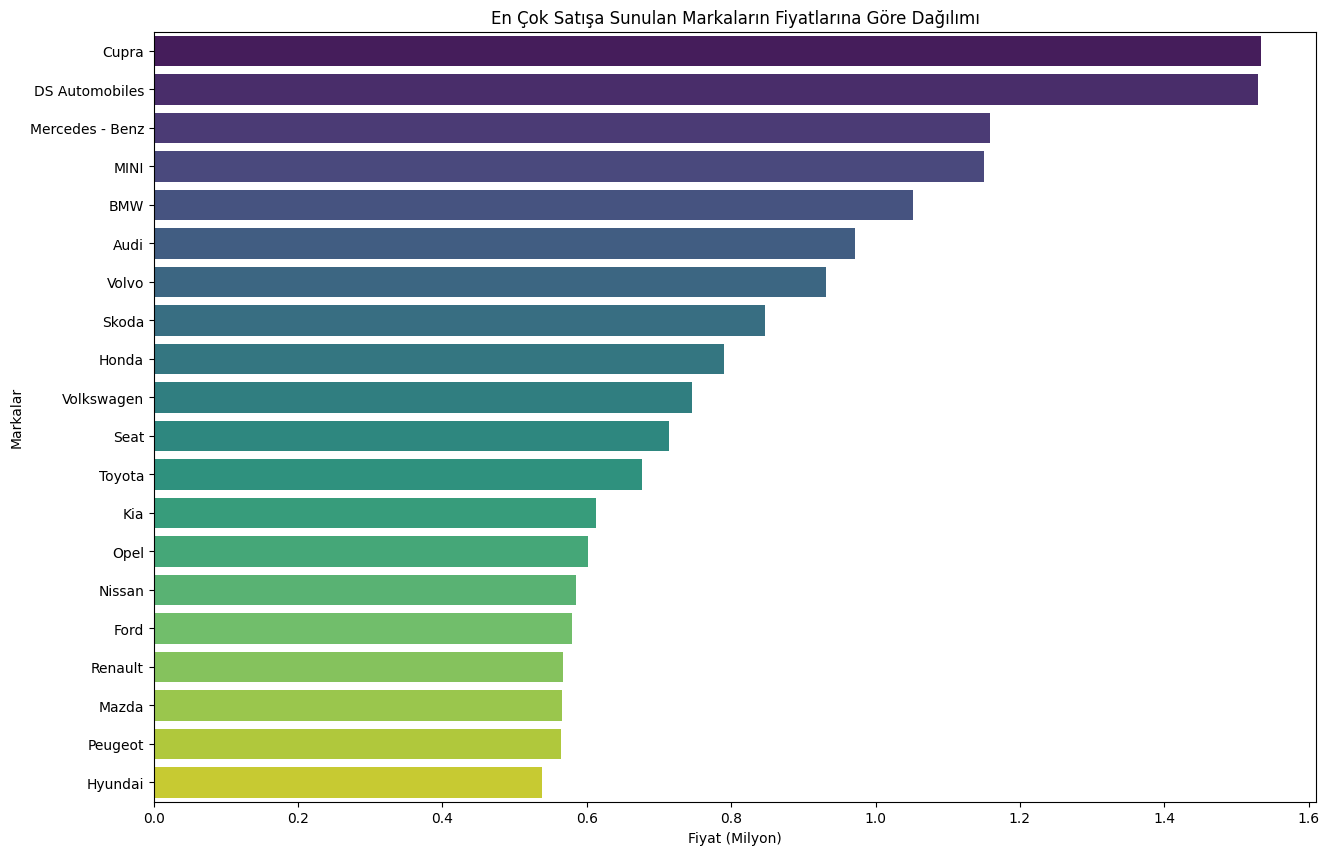

In [347]:
plt.figure(figsize=(15, 10))
sns.barplot(x=marka_['Fiyat'] / 1e6, y='Marka', data=marka_, palette='viridis')
plt.xlabel('Fiyat (Milyon)')
plt.ylabel('Markalar')
plt.title('En Çok Satışa Sunulan Markaların Fiyatlarına Göre Dağılımı')
plt.show()

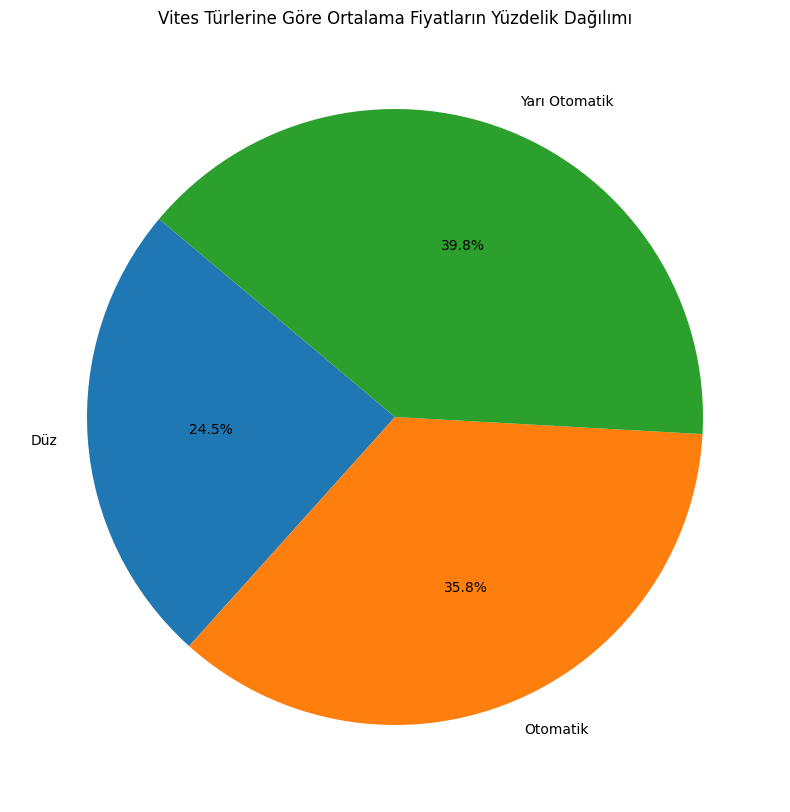

In [348]:
vites_ortalama_fiyat = df.groupby('Vites Tipi')['Fiyat'].mean().reset_index()

vites_ortalama_fiyat['Yüzde'] = (vites_ortalama_fiyat['Fiyat'] / vites_ortalama_fiyat['Fiyat'].sum()) * 100

# Görselleştirme
plt.figure(figsize=(10, 10))
plt.pie(vites_ortalama_fiyat['Yüzde'], labels=vites_ortalama_fiyat['Vites Tipi'], autopct='%1.1f%%',  startangle=140)
plt.title('Vites Türlerine Göre Ortalama Fiyatların Yüzdelik Dağılımı')
plt.show()

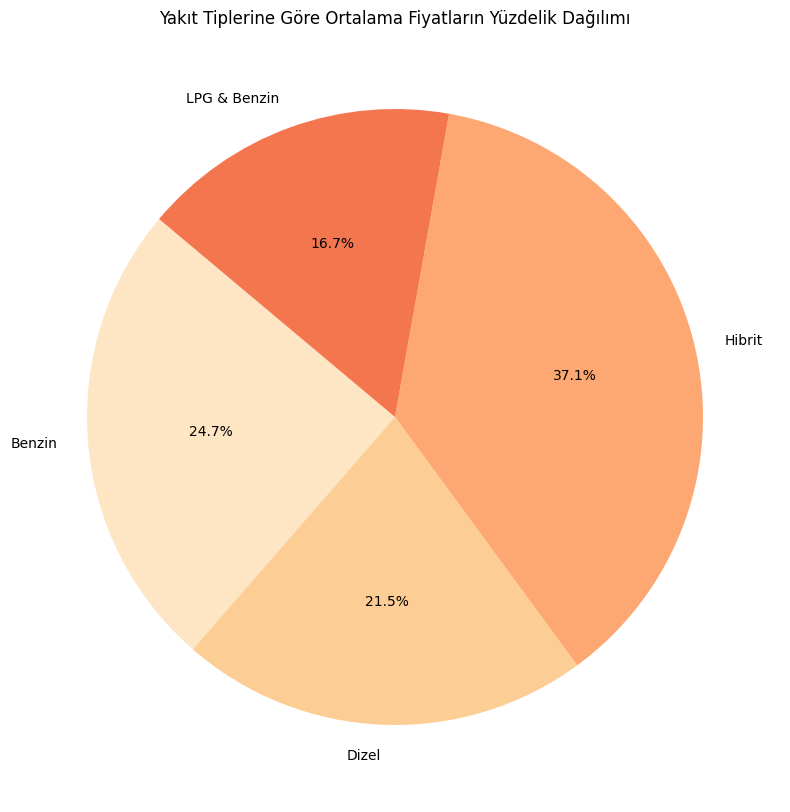

In [349]:
yakit_ortalama_fiyat = df.groupby('Yakıt Tipi')['Fiyat'].mean().reset_index()


yakit_ortalama_fiyat['Yüzde'] = (yakit_ortalama_fiyat['Fiyat'] / yakit_ortalama_fiyat['Fiyat'].sum()) * 100


plt.figure(figsize=(10, 10))
plt.pie(yakit_ortalama_fiyat['Yüzde'], labels=yakit_ortalama_fiyat['Yakıt Tipi'], autopct='%1.1f%%', colors=sns.color_palette('OrRd'), startangle=140)
plt.title('Yakıt Tiplerine Göre Ortalama Fiyatların Yüzdelik Dağılımı')
plt.show()

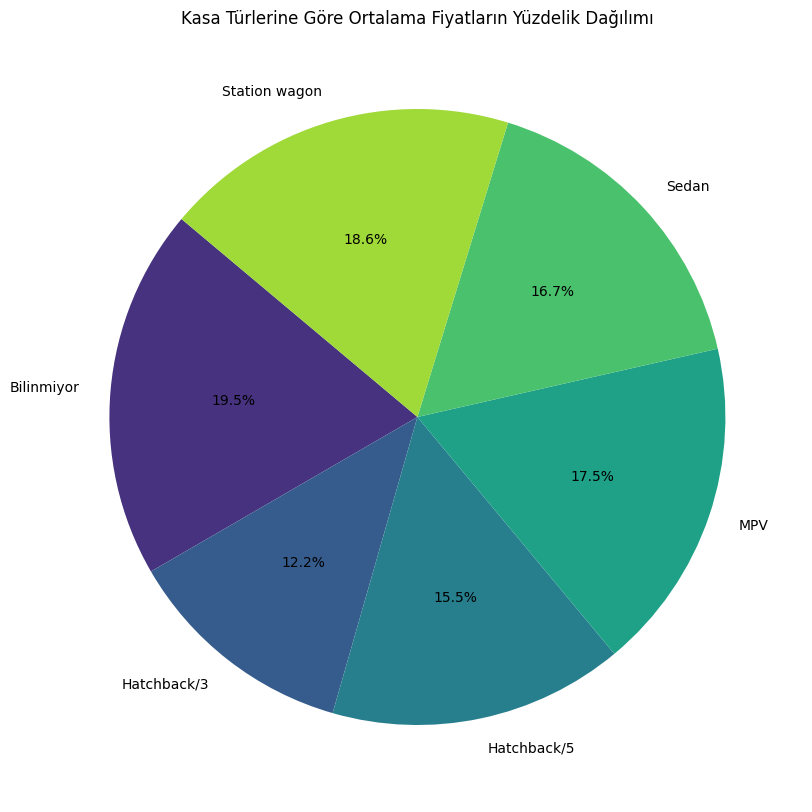

In [350]:
kasa_ortalama_fiyat = df.groupby('Kasa Tipi')['Fiyat'].mean().reset_index()


kasa_ortalama_fiyat['Yüzde'] = (kasa_ortalama_fiyat['Fiyat'] / kasa_ortalama_fiyat['Fiyat'].sum()) * 100

plt.figure(figsize=(10, 10))
plt.pie(kasa_ortalama_fiyat['Yüzde'], labels=kasa_ortalama_fiyat['Kasa Tipi'], autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Kasa Türlerine Göre Ortalama Fiyatların Yüzdelik Dağılımı')
plt.show()

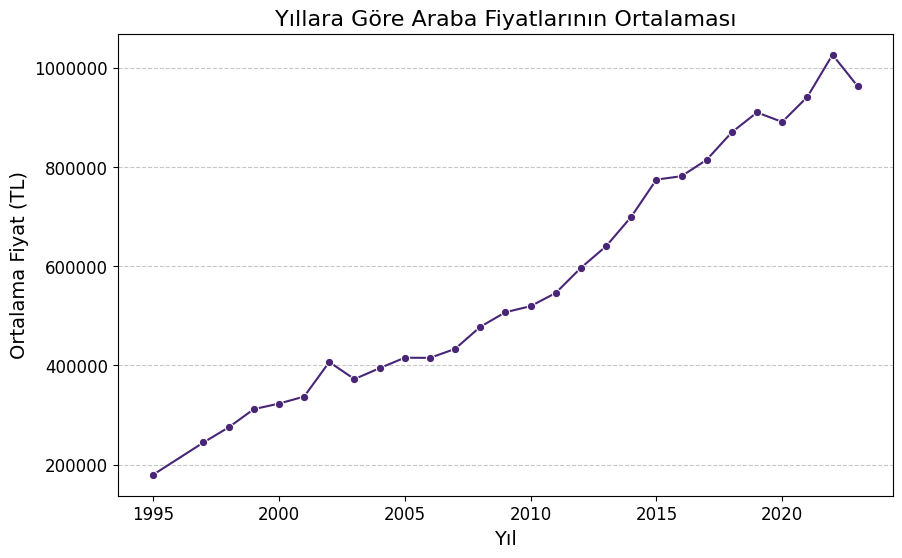

In [351]:
ortalama_fiyatlar = df.groupby('Yıl')['Fiyat'].mean().reset_index()


colors = sns.color_palette("viridis", len(ortalama_fiyatlar))


plt.figure(figsize=(10, 6))
sns.lineplot(x='Yıl', y='Fiyat', data=ortalama_fiyatlar, marker='o', color=colors[2])

plt.ticklabel_format(style='plain', axis='y') 


plt.title('Yıllara Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Ortalama Fiyat (TL)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

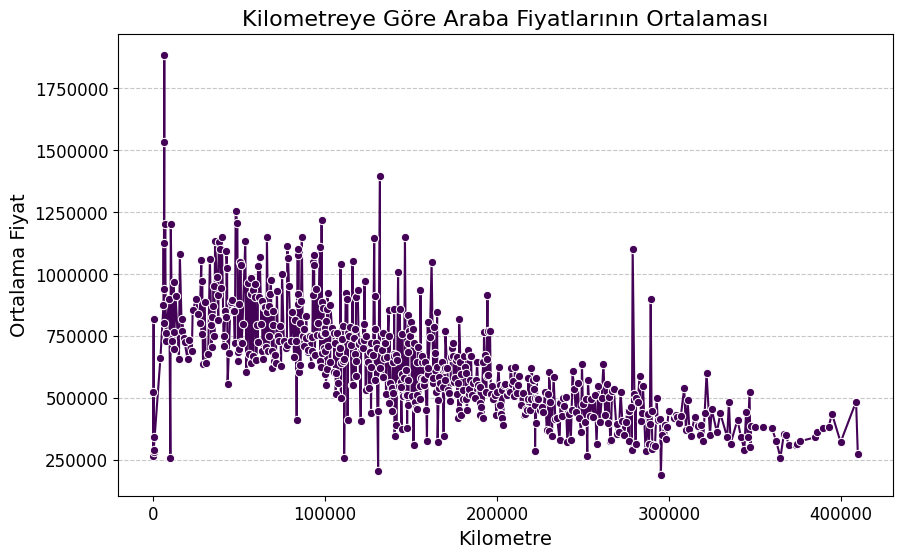

In [352]:

ortalama_fiyatlar = df.groupby('Kilometre')['Fiyat'].mean().reset_index()


colors = sns.color_palette("viridis", len(ortalama_fiyatlar))

plt.figure(figsize=(10, 6))
sns.lineplot(x='Kilometre', y='Fiyat', data=ortalama_fiyatlar, marker='o', color=colors[2])

plt.ticklabel_format(style='plain', axis='y')  # Y ekseni değerlerini bilimsel gösterimden kaldırma

plt.title('Kilometreye Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Kilometre', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

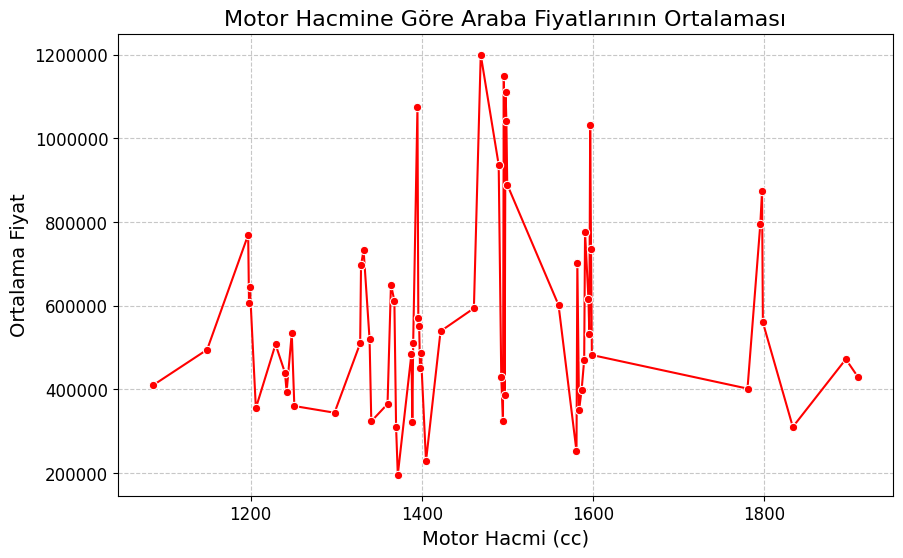

In [353]:

ortalama_fiyatlar = df.groupby('Motor Hacmi')['Fiyat'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Motor Hacmi', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='red')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Motor Hacmine Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Motor Hacmi (cc)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

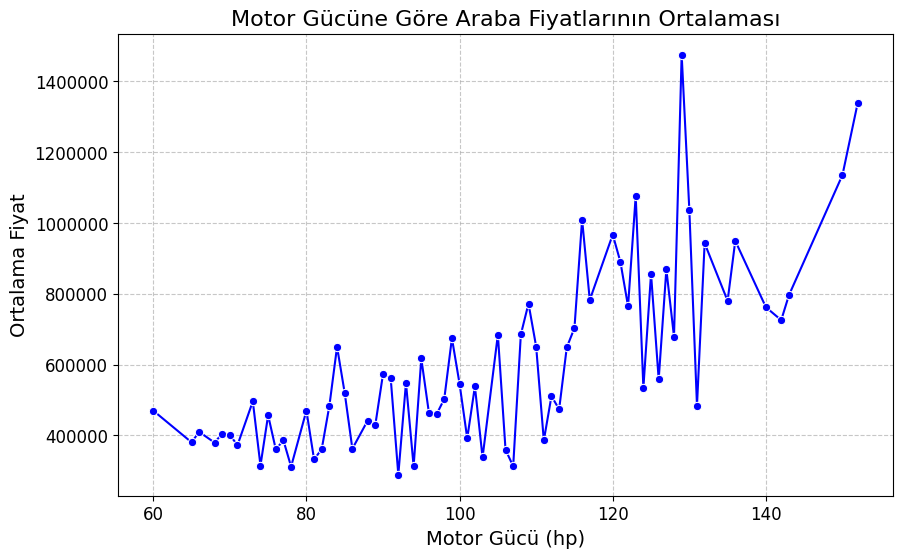

In [354]:
ortalama_fiyatlar = df.groupby('Motor Gücü')['Fiyat'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Motor Gücü', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='blue')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Motor Gücüne Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Motor Gücü (hp)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

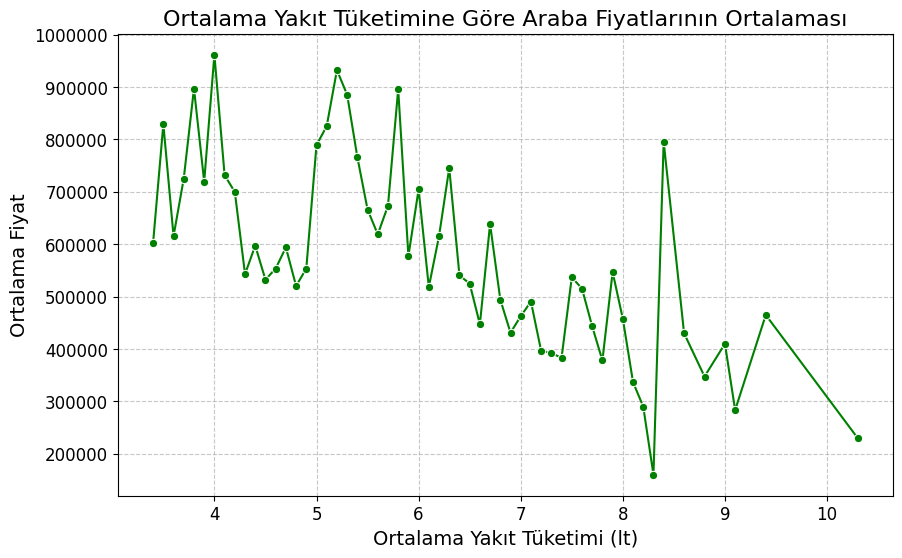

In [355]:
ortalama_fiyatlar = df.groupby('Ort. Yakıt Tüketimi')['Fiyat'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Ort. Yakıt Tüketimi', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='green')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Ortalama Yakıt Tüketimine Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Ortalama Yakıt Tüketimi (lt)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

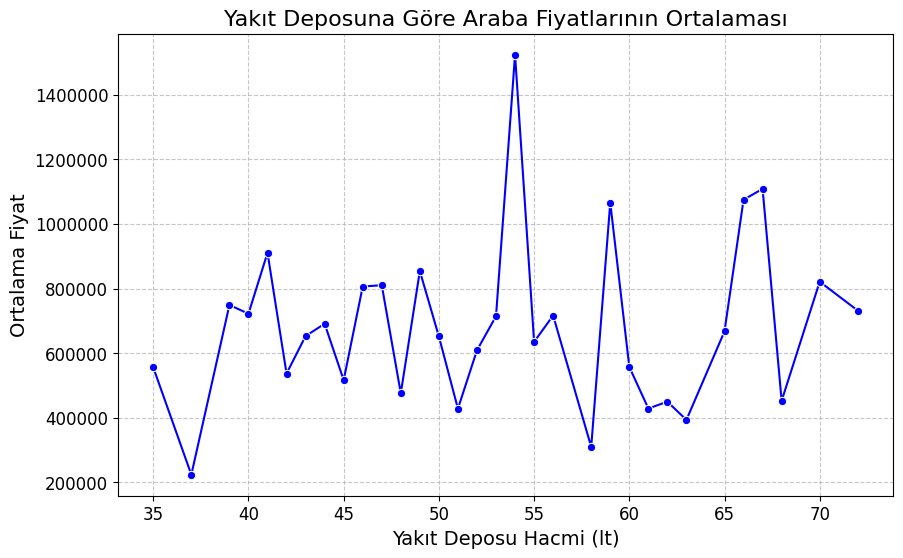

In [356]:
ortalama_fiyatlar = df.groupby('Yakıt Deposu')['Fiyat'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Yakıt Deposu', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='blue')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Yakıt Deposuna Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Yakıt Deposu Hacmi (lt)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

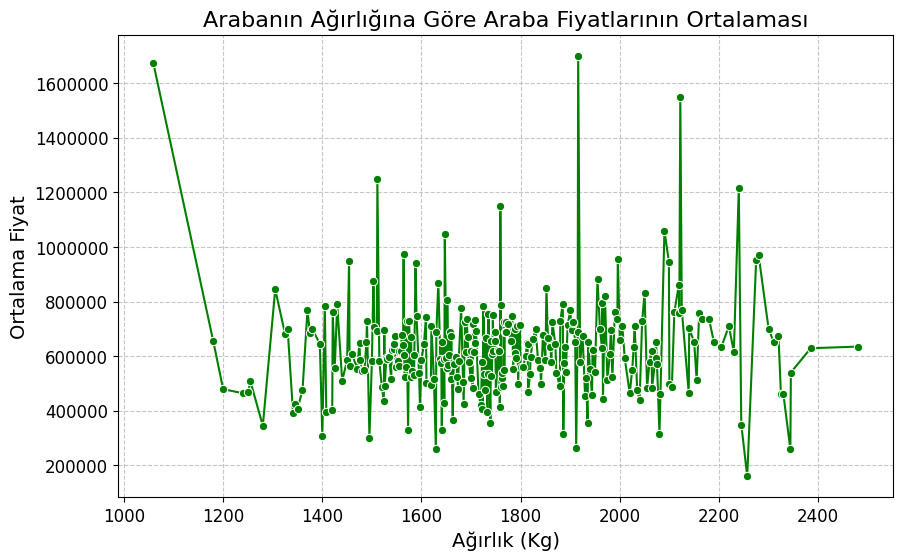

In [357]:
ortalama_fiyatlar = df.groupby('Agirlik')['Fiyat'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Agirlik', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='green')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Arabanın Ağırlığına Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Ağırlık (Kg)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

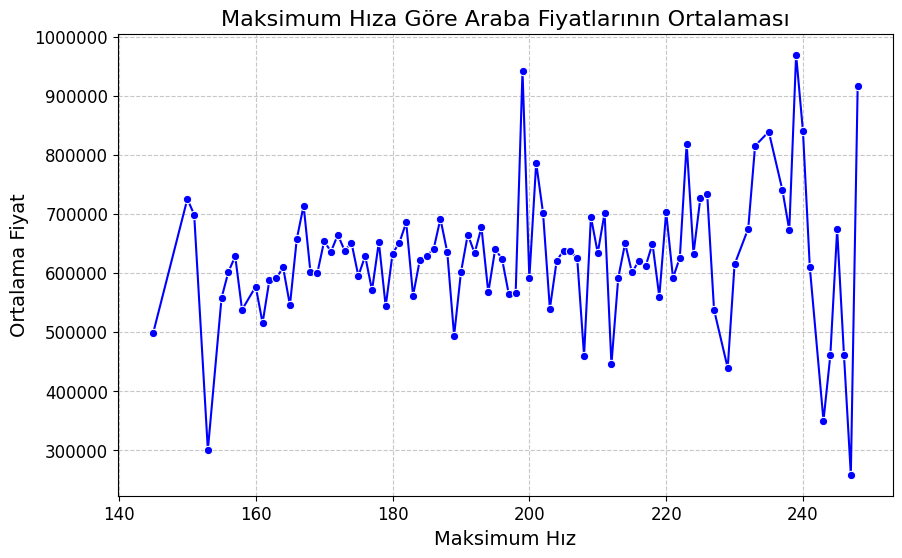

In [358]:
ortalama_fiyatlar = df.groupby('Maksimum Hız')['Fiyat'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Maksimum Hız', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='blue')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Maksimum Hıza Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Maksimum Hız', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

In [359]:
############################

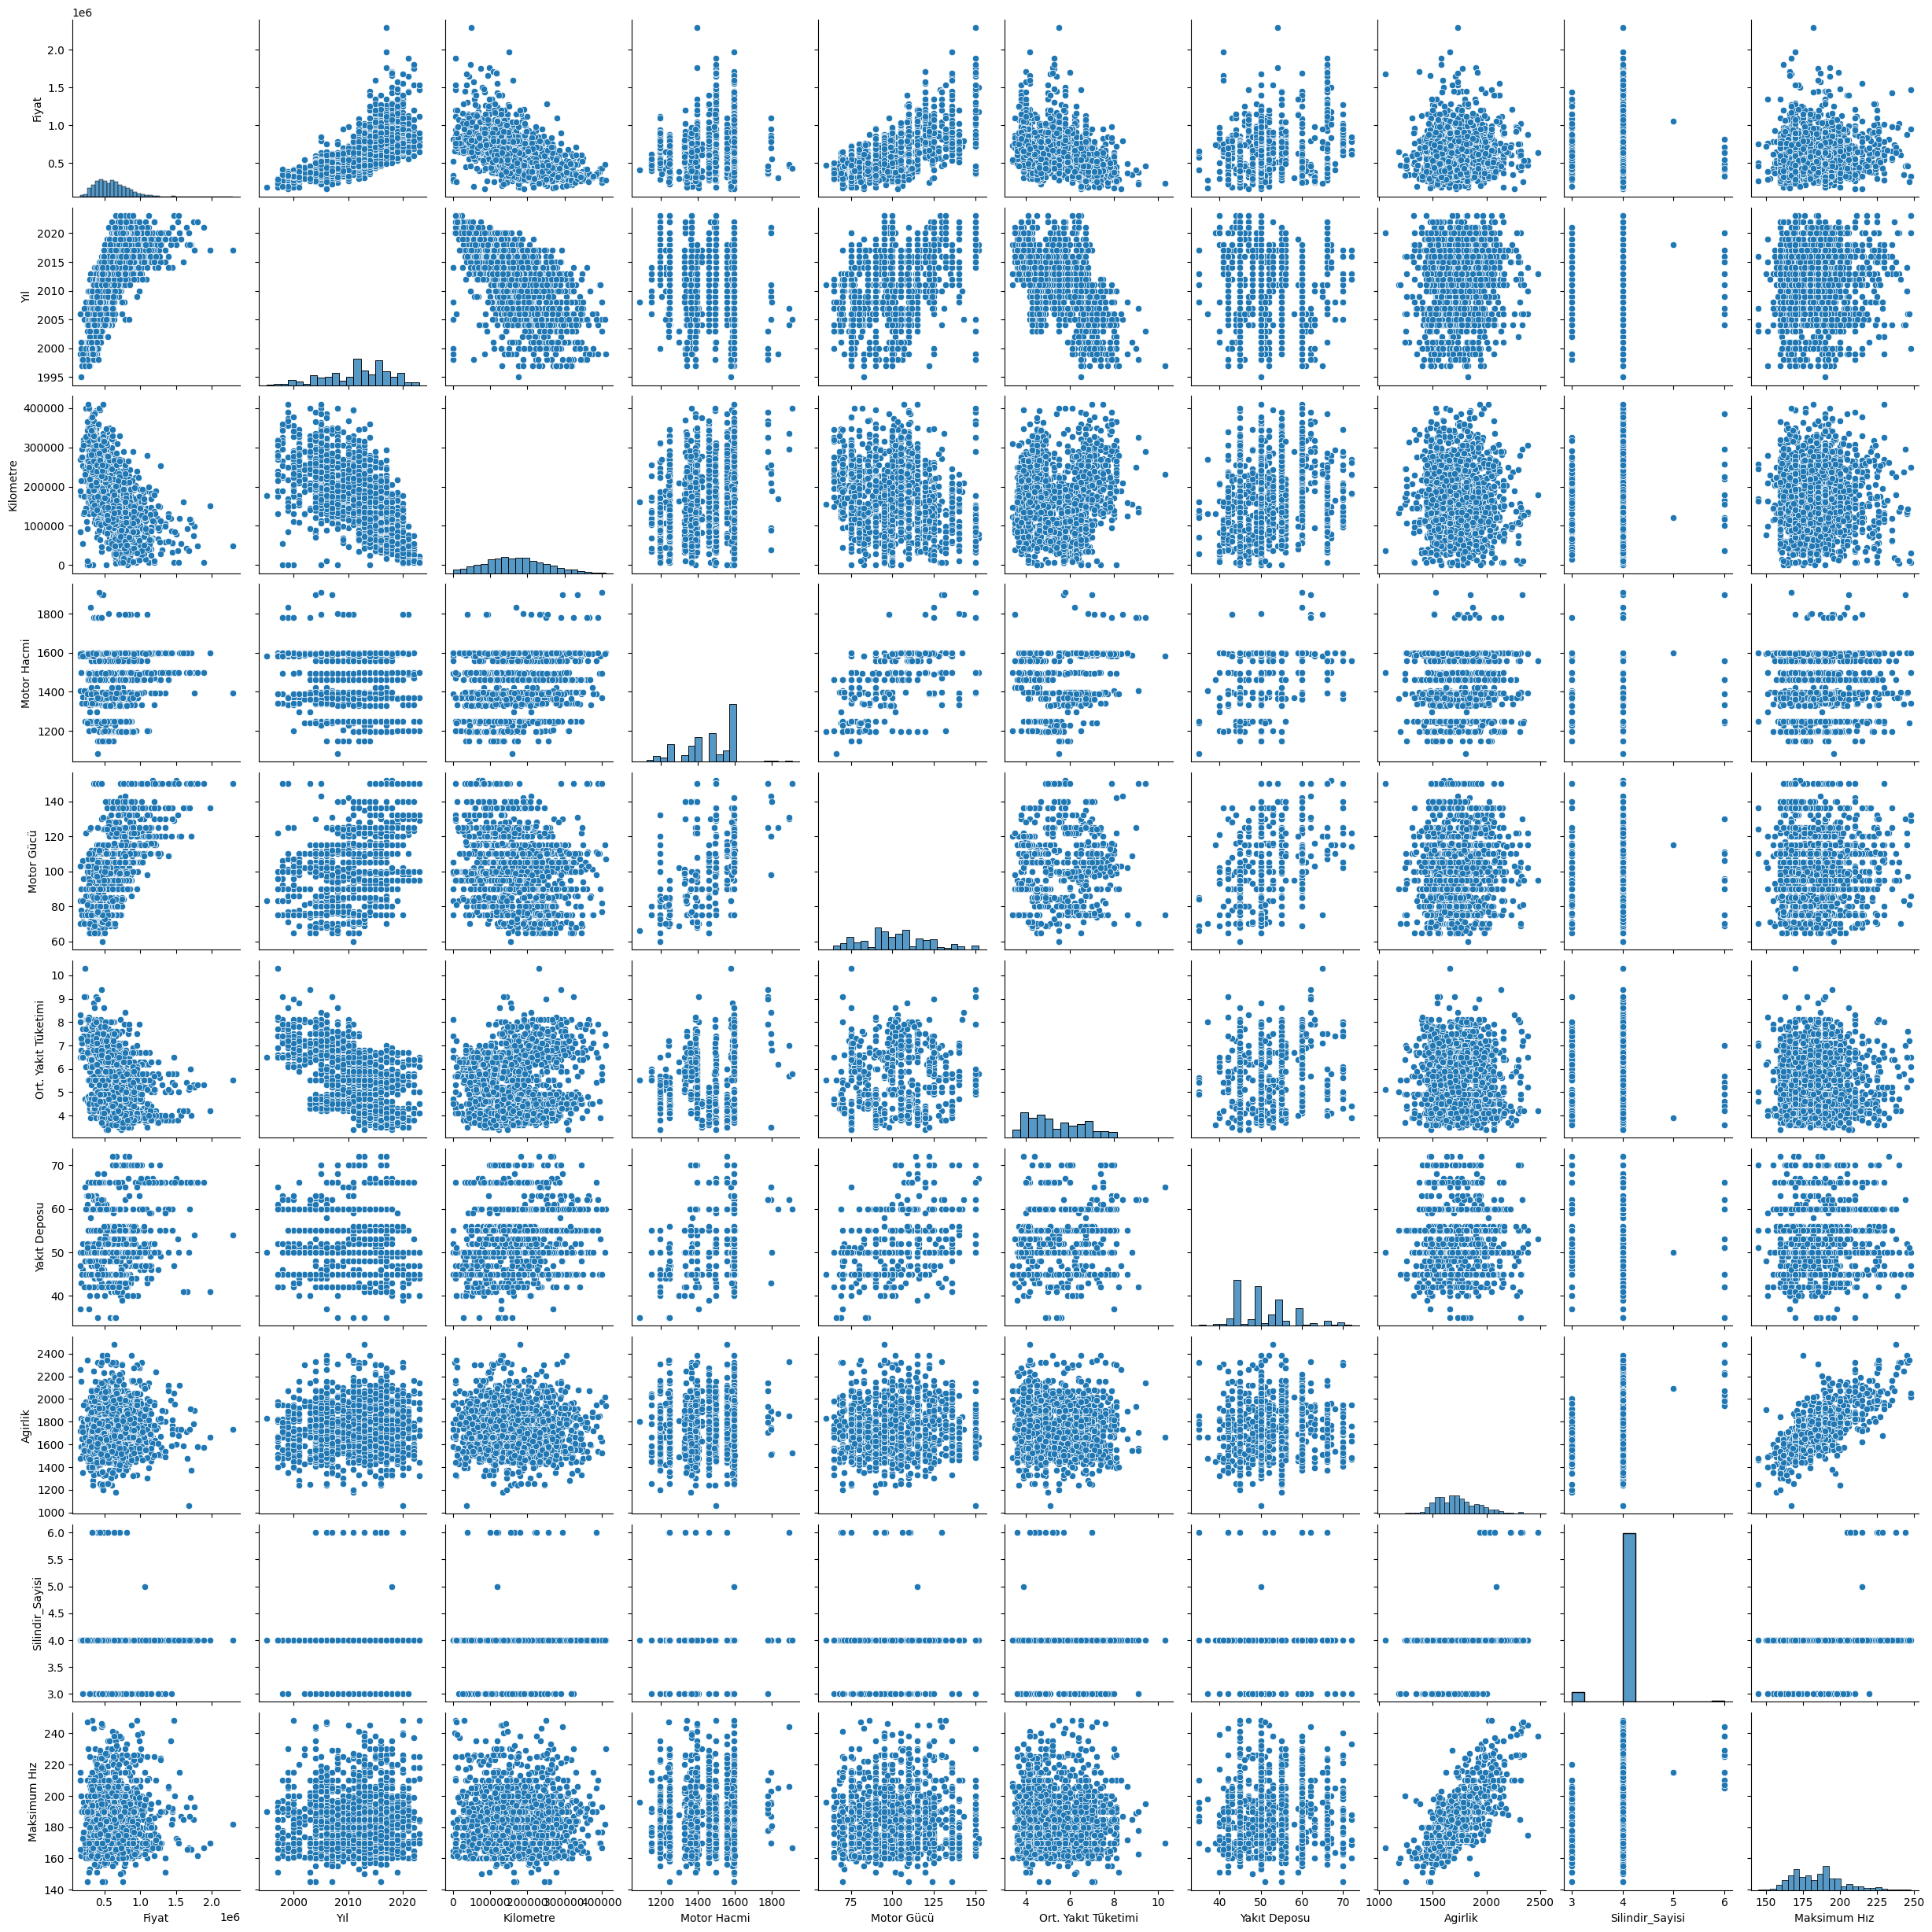

In [360]:
sns.pairplot(df)

In [361]:
df.to_csv("cardata_for_model.csv",index=False)